## SPOTIFY DATA

### Description of the Dataset:

* The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

#### Column Descriptors:


* Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
* Track Name: The title of the track, encapsulating its identity and essence.
* Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
* Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
* Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.


#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Q1: Load the dataframe and ensure data quality by checking for missing values and duplicate rows.Handle missing values and remove duplicate rows if necessary

In [2]:
df = pd.read_csv('spotify.csv')

In [3]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


#### Checking for duplicate values in the dataset

In [5]:
df.duplicated().sum()

27

In [6]:
df = df.drop_duplicates(keep=False)

In [7]:
df.duplicated().sum()

0

#### Checking for null/missing values in the dataset

In [8]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [9]:
df.nunique()

Artist           114
Track Name       386
Popularity        49
Duration (ms)    384
Track ID         387
dtype: int64

* Since all track id aree diff so they add value as a feature so drop them

In [10]:
df.drop(columns='Track ID', inplace=True)

In [11]:
df.head()

,Artist,Track Name,Popularity,Duration (ms)
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191
1,Drake,One Dance,91,173986
2,Drake,IDGAF (feat. Yeat),90,260111
5,Drake,God's Plan,87,198973
6,Drake,Passionfruit,86,298940


### Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

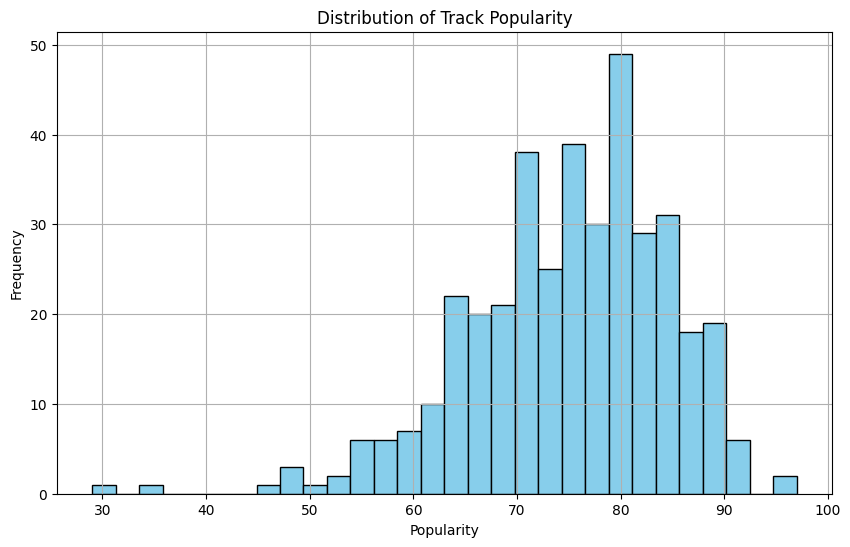

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Q3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

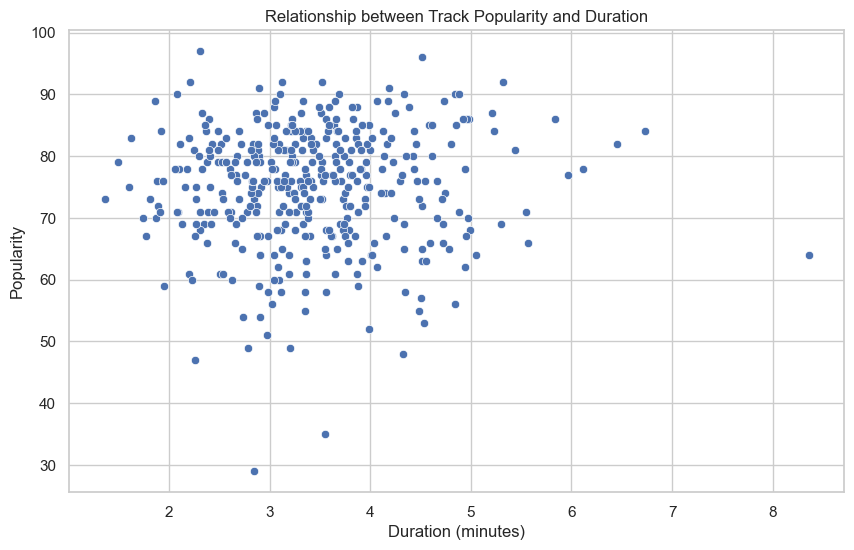

In [13]:
df['Duration (min)'] = df['Duration (ms)'] / 60000
df.drop(columns='Duration (ms)', inplace=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (min)', y='Popularity', data=df)
plt.title('Relationship between Track Popularity and Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.show()


* Tracks with popularity scores between 80 and 100 are found across different durations, with a slight concentration around the 2.5 to 4.5-minute mark.

* There doesn't seem to be a strong linear relationship between track duration and popularity. The points are widely scattered, 
   indicating that both short and long tracks can be popular.

### Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [14]:
df['Artist'].unique().sum()

'DrakePost MaloneNoah KahanNicki MinajJustin BieberJessie JKAROL GTravis ScottSZAJack HarlowJung KookLyrical LemonadeMetro BoominFutureDon ToliverLil WayneYeat21 SavageEminemKendrick LamarBaby KeemThe WeekndJAY-ZCardi BBruno MarsEd SheeranGloRillaGunnaInternet MoneySarzLil BabyJ. ColecassöD-Block EuropeClavishLattoYoung NudyMegan Thee StallionNEIKEDDr. DreSnoop Doggbenny blancoYoung ThugChris BrownDaveCentral CeeThe Kid LAROIQuevedoAnuel AASAIKODavid GuettaCoi LerayPressaFivio ForeignRAYEArizona ZervasPharrell WilliamsXXXTENTACIONKane BrownEllie GouldingReneé RappMaroon 5DJ SnakeQuavoDJ KhaledATL JacobJason DeruloKanye WestBizarrapTruenoRauw AlejandroDua LipaDaBabyThat Mexican OT¥$Lil DurkNardo WickOnly The FamilyPlayboi CartiFlo RidaLil Nas XTygaOscar MaydonBlxstDoja CatJuice WRLDLil Uzi VertWiz Khalifa2 ChainzIce SpicePinkPantheressTaylor SwiftJustin TimberlakeLeslie Odom Jr.Lin-Manuel MirandaCamila Cabello*NSYNCLudacrisTimbalandGucci ManeA Boogie Wit da HoodieKodak BlackLil TeccaFug

Total number of tracks: Artist
Drake            14
Eminem           11
Timbaland        10
Ludacris         10
JAY-Z            10
                 ..
RAYE              1
Fivio Foreign     1
Pressa            1
David Guetta      1
Diddy             1
Name: count, Length: 114, dtype: int64


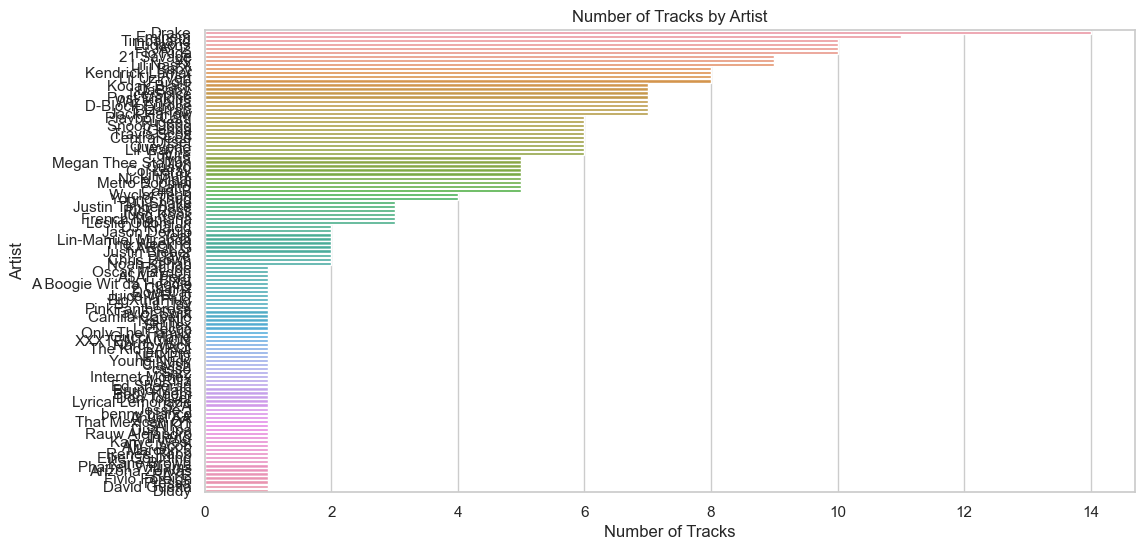

In [15]:
artist_track_counts = df['Artist'].value_counts()
print(f"Total number of tracks: {artist_track_counts}")
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df, order=artist_track_counts.index)
plt.title('Number of Tracks by Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


### Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [16]:
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)
least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks)


            Artist                     Track Name  Popularity
207         Pressa  Attachments (feat. Coi Leray)          29
231  Justin Bieber                     Intentions          35
225       Lil Baby                  On Me - Remix          47
407    Wyclef Jean      911 (feat. Mary J. Blige)          48
418      Rick Ross                Millionaire Row          49


### Q6 .Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [17]:
avg_popularity = df.groupby('Artist')['Popularity'].mean()

top_5_artists = avg_popularity.nlargest(5)

print(top_5_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    85.666667
Anuel AA        85.000000
Name: Popularity, dtype: float64


### Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [18]:
avg_popularity = df.groupby('Artist')['Popularity'].mean()
top_5_artists = avg_popularity.nlargest(5).index
most_popular_tracks = df[df['Artist'].isin(top_5_artists)]
most_popular_tracks = most_popular_tracks.loc[most_popular_tracks.groupby('Artist')['Popularity'].idxmax()]
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


           Artist                    Track Name  Popularity
192      Anuel AA                            OA          85
200  David Guetta            Baby Don't Hurt Me          87
31   Travis Scott                      I KNOW ?          92
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92


### Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

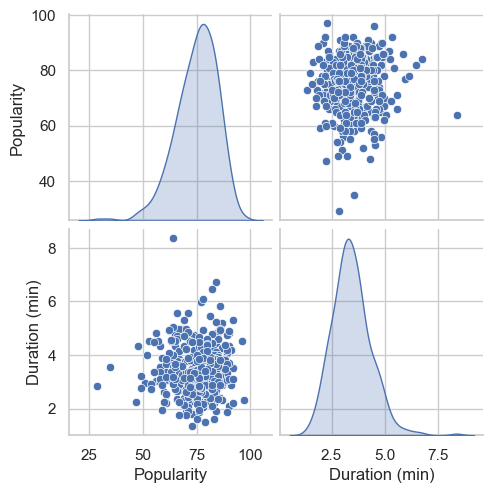

In [19]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

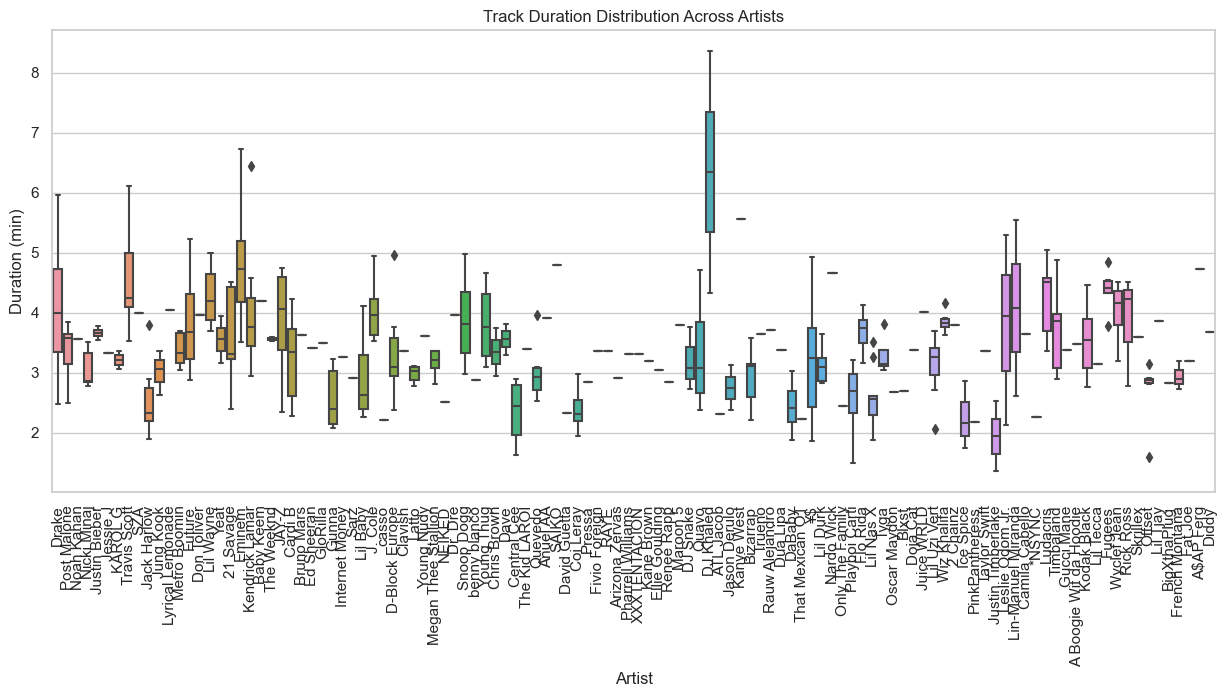

In [24]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Artist', y='Duration (min)', data=df)
plt.title('Track Duration Distribution Across Artists')
plt.xticks(rotation=90)
plt.show()

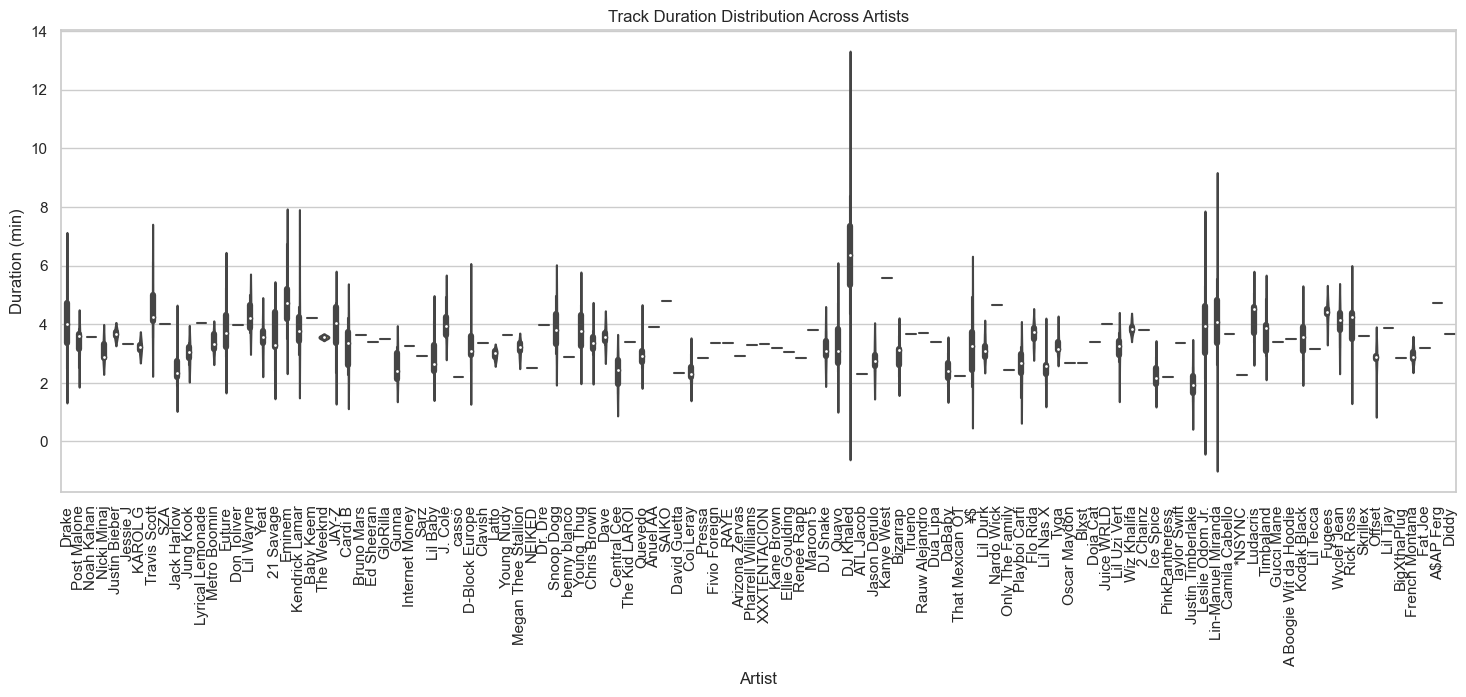

In [27]:
plt.figure(figsize=(18, 6))
sns.violinplot(x='Artist', y='Duration (min)', data=df)

# Display the plot
plt.title('Track Duration Distribution Across Artists')
plt.xticks(rotation=90)

plt.show()

* yes duration of songs vary significantly by artist

### Q10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

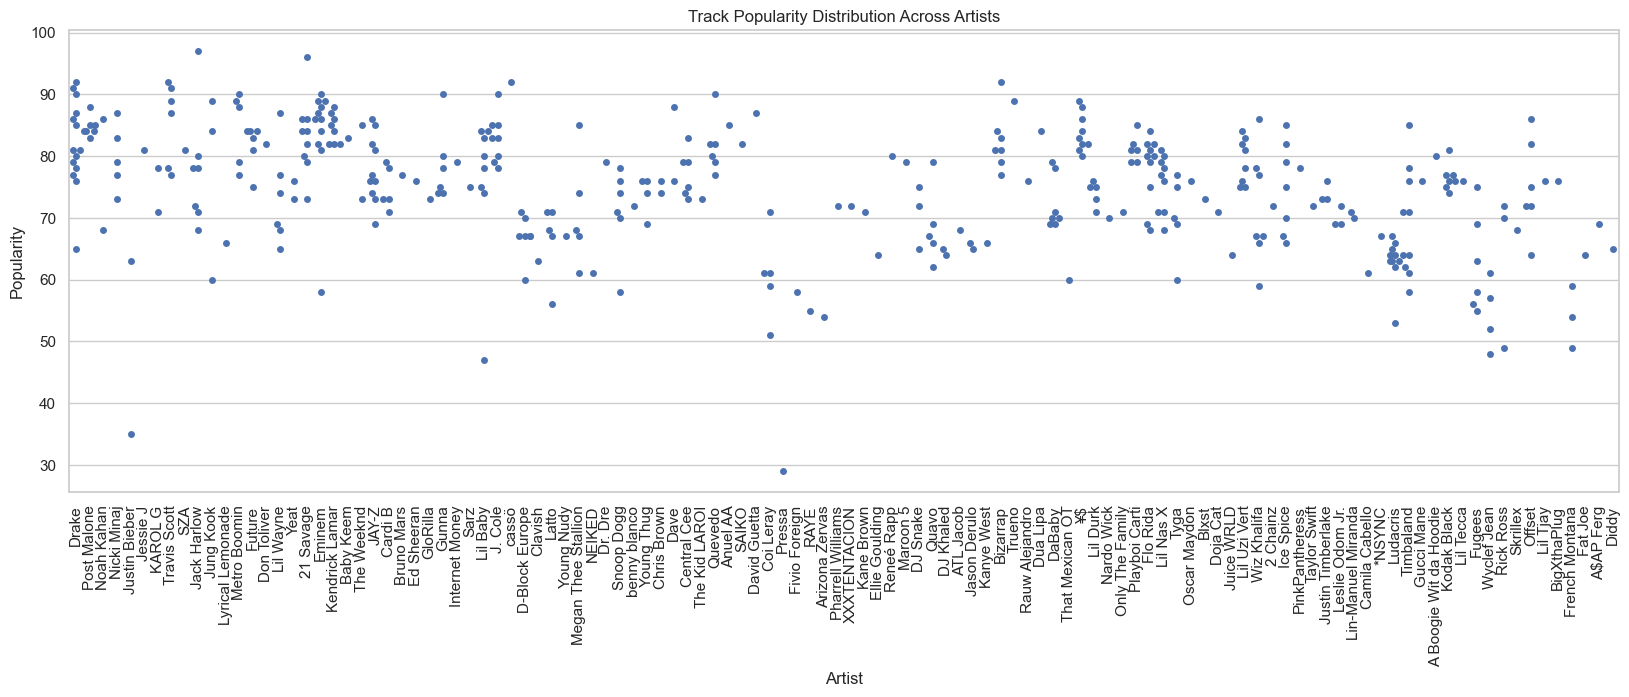

In [30]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.title('Track Popularity Distribution Across Artists')
plt.xticks(rotation=90)
plt.show()
